# Formación con 4 robots


Posiciones iniciales de una formación de 4 robots con un grafo de conexiones entre ellos definido

Posiciones iniciales de los agentes: [[-1  1]
 [ 1  1]
 [ 1 -1]
 [-1 -1]]


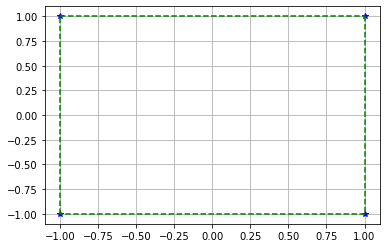

In [28]:
import RobotModels as rob
import robot_plot_utils as rplot
import numpy as np
import matplotlib.pyplot as plt
import graph_utils as graf


p=np.array([[-1, 1],[1,1],[1,-1],[-1, -1]])
pi=np.array([[-1, 1],[1,1],[1,-1],[-1, -1]])
Z=np.array([[1,2],[2,3],[3,4],[4,1]])
f,c=np.shape(p)
ps=np.zeros([2*f,1])
j=0
for i in range(f):
    ps[j]=p[i,0]
    ps[j+1]=p[i,1]
    j=j+2
    
plt.plot(p[:,0],p[:,1],'b*')
print("Posiciones iniciales de los agentes:",p)
g=np.zeros([2,2])
#Grafo
rplot.dibuja_grafo_2D(p,Z)
plt.grid()
plt.show() 

Mr tendría que ser una matriz de rotación pura

(8, 8)
[[ 0.22]
 [-0.02]
 [-0.02]
 [-0.22]
 [-0.22]
 [ 0.02]
 [ 0.02]
 [ 0.22]]


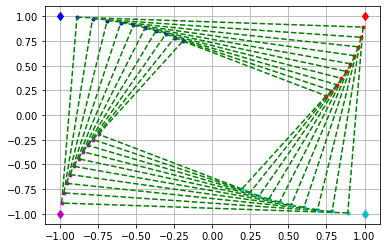

In [29]:
Mr=np.array([[-1,0,0,-1],[-1,-1,0,0],[0,-1,-1,0],[0,0,-1,-1]])
h=0.1
kapa=0.02
pesos=np.array([[1 ,1, 1, 1],[1,1,1,1],[1,1,1,1],[1,1,1,1]])
L=graf. matriz_laplaciana(Z,pesos,4,4)
B=graf.matriz_incidencia(Z,4,4)
Ld=L-(kapa/h)*Mr*B
Im=np.eye(2)
Ld_bar=np.kron(Ld,Im)
print(np.shape(Ld_bar))
pprima=-h*np.dot(Ld_bar,ps)
print(pprima)
dt=0.5
for k in range(10):
    for i in range(0,8,2):
        xdot,ydot,thetadot=rob.integrator_point_model(pprima[i],pprima[i+1])
        ps[i]+=xdot*dt
        ps[i+1]+=ydot*dt
        if i==0:
            plt.plot(ps[i],ps[i+1],'b.')
        elif i==2:
            plt.plot(ps[i],ps[i+1],'r.')
        elif i==4:
            plt.plot(ps[i],ps[i+1],'c.')
        else:
            plt.plot(ps[i],ps[i+1],'m.')
    pprima=-h*np.dot(Ld_bar,ps)
    p=graf.unstack(ps,2)
    #print(p)
    rplot.dibuja_grafo_2D(p,Z)
plt.plot(pi[0,0],pi[0,1],'bd')
plt.plot(pi[1,0],pi[1,1],'rd')
plt.plot(pi[2,0],pi[2,1],'cd')
plt.plot(pi[3,0],pi[3,1],'md')
plt.grid()
plt.show() 

In [ ]:
Vamos a cambiar la matriz a ver qué pasa ¿estaré calculando algo mal?
La matriz siguiente será la asociada a una traslación en el eje horizontal

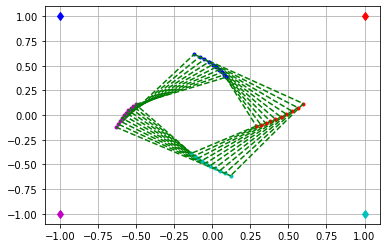

In [20]:
ps=np.zeros([2*f,1])
j=0
for i in range(f):
    ps[j]=p[i,0]
    ps[j+1]=p[i,1]
    j=j+2
Mt1=np.array([[0,0,0,0.5],[0,-0.5,0,0],[0,-0.5,0,0],[0,0,0,0.5]])
Ld=L-(kapa/h)*Mt1*B
Ld_bar=np.kron(Ld,Im)
#print(np.shape(Ld_bar))
pprima=-h*np.dot(Ld_bar,ps)
#print(pprima)
dt=0.5
for k in range(10):
    for i in range(0,8,2):
        xdot,ydot,thetadot=rob.integrator_point_model(pprima[i],pprima[i+1])
        ps[i]+=xdot*dt
        ps[i+1]+=ydot*dt
        if i==0:
            plt.plot(ps[i],ps[i+1],'b.')
        elif i==2:
            plt.plot(ps[i],ps[i+1],'r.')
        elif i==4:
            plt.plot(ps[i],ps[i+1],'c.')
        else:
            plt.plot(ps[i],ps[i+1],'m.') 
    pprima=-h*np.dot(Ld_bar,ps)
    p=graf.unstack(ps,2)
    #print(p)
    rplot.dibuja_grafo_2D(p,Z)
plt.plot(pi[0,0],pi[0,1],'bd')
plt.plot(pi[1,0],pi[1,1],'rd')
plt.plot(pi[2,0],pi[2,1],'cd')
plt.plot(pi[3,0],pi[3,1],'md')
plt.grid()
plt.show() 